In [1]:
import tensorflow as tf

## Get Dataset

In [2]:
import zipfile

## getting our dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## Unzip the download file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-06-17 09:38:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.207, 64.233.188.207, 64.233.189.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.9MB/s    in 5.5s    

2024-06-17 09:38:57 (19.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import os
## getting some info from our training and test set

# for dirpath,dirnames, filenames in os.walk('pizza_steak'):
#   print(f"There are {len(filenames)} images in {dirpath}")

## Train dataset
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))

## Test dataset
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))


num_steak_images_train,num_pizza_images_train,num_steak_images_test,num_pizza_images_test



(750, 750, 250, 250)

## Model

In [4]:
## preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## here first we will make an object from a class that will normalize our data and turn it into batches
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

## dirs
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

##
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size=(224,224),
    class_mode = 'binary',
    seed=42
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size=(224,224),
    class_mode = 'binary',
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [5]:
## CNN model = Tiny VGG
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation='relu',
        input_shape=(224,224,3)),

    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [6]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=["accuracy"]
)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [7]:
model_1.fit(train_data,epochs=8,steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

## as we have more epochs we see overfitting disease

Epoch 1/8
47/47 [==============================] - 14s 166ms/step - loss: 0.5772 - accuracy: 0.7000 - val_loss: 0.4193 - val_accuracy: 0.8340
Epoch 2/8
47/47 [==============================] - 6s 131ms/step - loss: 0.4467 - accuracy: 0.8027 - val_loss: 0.3657 - val_accuracy: 0.8620
Epoch 3/8
47/47 [==============================] - 5s 115ms/step - loss: 0.4281 - accuracy: 0.7987 - val_loss: 0.3803 - val_accuracy: 0.8380
Epoch 4/8
47/47 [==============================] - 6s 116ms/step - loss: 0.3805 - accuracy: 0.8367 - val_loss: 0.3462 - val_accuracy: 0.8520
Epoch 5/8
47/47 [==============================] - 7s 141ms/step - loss: 0.3184 - accuracy: 0.8680 - val_loss: 0.3605 - val_accuracy: 0.8440
Epoch 6/8
47/47 [==============================] - 6s 118ms/step - loss: 0.2454 - accuracy: 0.9140 - val_loss: 0.3356 - val_accuracy: 0.8400
Epoch 7/8
47/47 [==============================] - 6s 133ms/step - loss: 0.1537 - accuracy: 0.9507 - val_loss: 0.5090 - val_accuracy: 0.7960
Epoch 8/8
47

In [8]:
# model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
#             validation_data=test_data,
#             validation_steps=len(test_data)
#             )

## Another model to compare with CNN model

In [9]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [10]:
## compile it
model_2.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model_2.fit(train_data,epochs=8,steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

## as you can see in accuracy results the model is acting randomly.

Epoch 1/8
47/47 [==============================] - 7s 118ms/step - loss: 0.8002 - accuracy: 0.5193 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/8
47/47 [==============================] - 5s 114ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/8
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/8
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/8
47/47 [==============================] - 6s 127ms/step - loss: 0.6932 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/8
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/8
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/8
47/

## 2nd model without CNN

In [12]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [13]:
model_3.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
model_3.summary()

## as you can see it has a lot of params to train

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model_3.fit(train_data,epochs=8,steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )
## the output will be better but too many params to learn.

Epoch 1/8
47/47 [==============================] - 8s 125ms/step - loss: 2.5755 - accuracy: 0.6393 - val_loss: 0.7254 - val_accuracy: 0.7400
Epoch 2/8
47/47 [==============================] - 5s 108ms/step - loss: 1.1681 - accuracy: 0.6740 - val_loss: 0.6472 - val_accuracy: 0.7800
Epoch 3/8
47/47 [==============================] - 7s 145ms/step - loss: 0.6944 - accuracy: 0.7613 - val_loss: 0.4374 - val_accuracy: 0.8040
Epoch 4/8
47/47 [==============================] - 5s 107ms/step - loss: 0.6068 - accuracy: 0.7320 - val_loss: 0.7177 - val_accuracy: 0.6420
Epoch 5/8
47/47 [==============================] - 7s 152ms/step - loss: 0.5461 - accuracy: 0.7647 - val_loss: 0.4931 - val_accuracy: 0.7600
Epoch 6/8
47/47 [==============================] - 5s 107ms/step - loss: 0.6242 - accuracy: 0.7307 - val_loss: 0.6810 - val_accuracy: 0.7060
Epoch 7/8
47/47 [==============================] - 6s 128ms/step - loss: 0.4543 - accuracy: 0.8040 - val_loss: 0.4614 - val_accuracy: 0.7640
Epoch 8/8
47/

## binary Classification

* working with data and get familiar wtih it
* preprocess the data
* create a model
* fit the model
* evaluate the model
* adjust different params and enhance model


In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


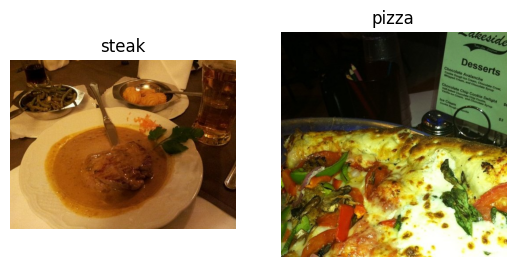

In [16]:
## working with data and get familiar with it
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [17]:
### preprocess the data for model

## image Data generator = create batches of the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

## rescale = means change the scale of all values of all pixels in an image
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## make our train data and test data
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224,224), ## Target size of images(height,width)
    class_mode = 'binary', ## binary or sparse?
    batch_size = 32 ## size of mini-batch => Le Cunn suggested 32 in twitter :)
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224,224),
    class_mode = 'binary',
    batch_size = 32
)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [19]:
images[0]

array([[[0.34901962, 0.10588236, 0.00784314],
        [0.3647059 , 0.12156864, 0.02352941],
        [0.3647059 , 0.1137255 , 0.00784314],
        ...,
        [0.21568629, 0.01568628, 0.00392157],
        [0.21960786, 0.01960784, 0.00784314],
        [0.19607845, 0.        , 0.        ]],

       [[0.3529412 , 0.10980393, 0.01176471],
        [0.3529412 , 0.10980393, 0.01176471],
        [0.3529412 , 0.10196079, 0.        ],
        ...,
        [0.22352943, 0.02352941, 0.01176471],
        [0.21960786, 0.02745098, 0.01176471],
        [0.21176472, 0.01568628, 0.01176471]],

       [[0.34901962, 0.10588236, 0.00784314],
        [0.3372549 , 0.09803922, 0.        ],
        [0.37647063, 0.1254902 , 0.01568628],
        ...,
        [0.22352943, 0.03137255, 0.01568628],
        [0.21568629, 0.02745098, 0.01176471],
        [0.21568629, 0.02745098, 0.01176471]],

       ...,

       [[0.52156866, 0.2509804 , 0.08627451],
        [0.6156863 , 0.34901962, 0.16470589],
        [0.6901961 , 0

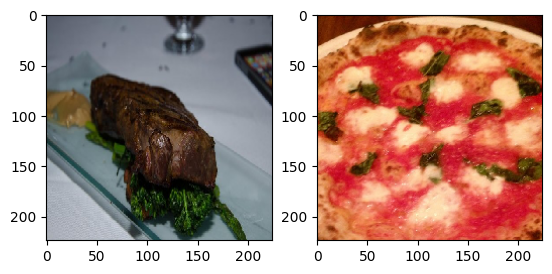

In [20]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(images[31])
plt.subplot(1,2,2)
plt.imshow(images[0])


In [21]:
### create our model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [22]:
model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=(3,3),
        padding='valid',
        activation='relu',
        input_shape=(224,224,3)
    ), ## input layer
    Conv2D(10,(3,3),activation='relu'),
    Conv2D(10,(3,3),activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid') ## output layer
])

In [23]:
model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch = len(train_data),
    validation_data=test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 0.6505 - accuracy: 0.6853 - val_loss: 0.4785 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4498 - accuracy: 0.8047 - val_loss: 0.4031 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3507 - accuracy: 0.8547 - val_loss: 0.4213 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.2357 - accuracy: 0.9113 - val_loss: 0.4296 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.1122 - accuracy: 0.9640 - val_loss: 0.5368 - val_accuracy: 0.7620


In [25]:
## evaluation
model_1.evaluate(test_data)

16/16 [==============================] - 2s 100ms/step - loss: 0.4486 - accuracy: 0.8080


[0.44860655069351196, 0.8080000281333923]

In [26]:
## evaluation
model_4.evaluate(test_data)

16/16 [==============================] - 1s 81ms/step - loss: 0.5368 - accuracy: 0.7620


[0.5368063449859619, 0.7620000243186951]

# Note :
* in model_4 as we can see we faced overfitting problem where our accuracy on training set is too high but has a astonishing space and difference wtih validation set accuracy.

## How to overcome Overfitting:
* add data augmentation
* add regularization layers such as MaxPool2D
* add more data...

## How overfitting can be increased?
* increase the number of conv filters and layers
* add another dense layer to the output of our flattened layer.

In [27]:
model_5 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=(3,3),
        padding='valid',
        activation='relu',
        input_shape=(224,224,3)
    ), ## input layer
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,(3,3),activation='relu'),
    MaxPool2D(),
    Conv2D(10,(3,3),activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid') ## output layer
])

In [28]:
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [29]:
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch = len(train_data),
    validation_data=test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 8s 122ms/step - loss: 0.6201 - accuracy: 0.6620 - val_loss: 0.4495 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4707 - accuracy: 0.7927 - val_loss: 0.4033 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4332 - accuracy: 0.8073 - val_loss: 0.4267 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4230 - accuracy: 0.8180 - val_loss: 0.3748 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3914 - accuracy: 0.8240 - val_loss: 0.3378 - val_accuracy: 0.8660


## Result:
* as you can see the accuracy of training set and validation set is now close to each other.
* or more correctly their loss is much closer now.

In [30]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))


  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

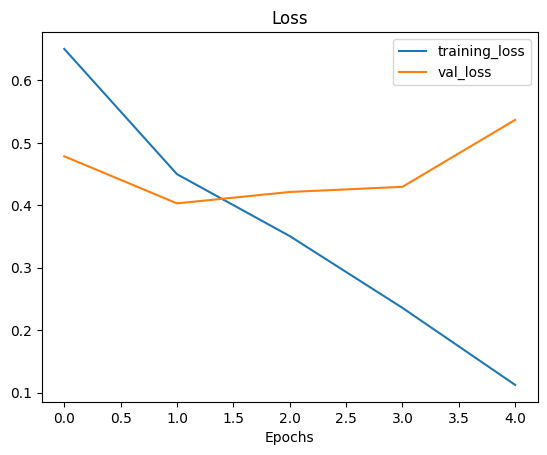

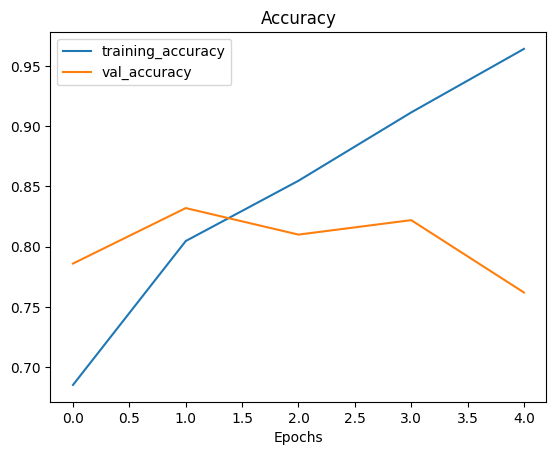

In [31]:
plot_loss_curves(history_4)

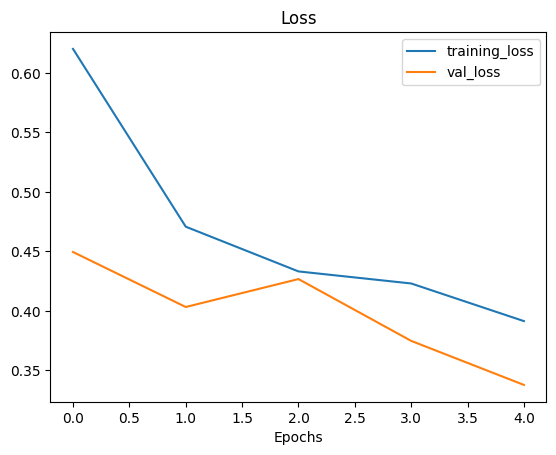

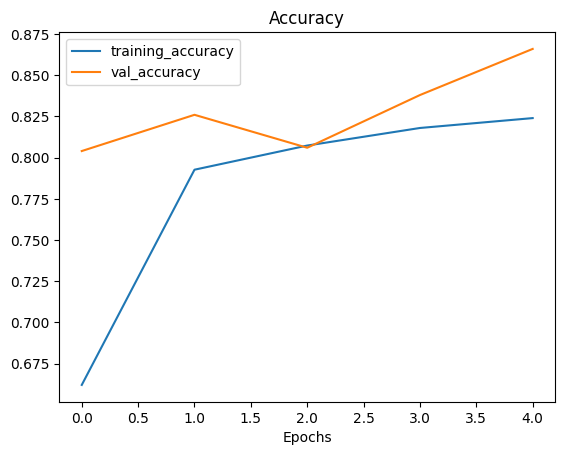

In [32]:
plot_loss_curves(history_5)

# Data Augmentation:
* it means increase the diversity of training dataset instead of collecting more data.increasing diversity forces a model to learn more generalisation patterns
* we use data augmentation only on training set.

In [33]:
## Data Augmentation for reducing overfitting

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


In [34]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [35]:
## create a model like model_5 for augmented data

model_6 = Sequential([
    Conv2D(filters=10,kernel_size=(3,3),activation = 'relu'),
    MaxPool2D(pool_size=(2,2)), ## its default size is 2,2
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

In [36]:
model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [39]:
history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 450ms/step - loss: 0.7334 - accuracy: 0.5053 - val_loss: 0.6930 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6928 - accuracy: 0.5380 - val_loss: 0.6905 - val_accuracy: 0.5700
Epoch 3/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6923 - accuracy: 0.5300 - val_loss: 0.6895 - val_accuracy: 0.6100
Epoch 4/5
47/47 [==============================] - 20s 421ms/step - loss: 0.6923 - accuracy: 0.5413 - val_loss: 0.6898 - val_accuracy: 0.6140
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6875 - accuracy: 0.5793 - val_loss: 0.6651 - val_accuracy: 0.7100


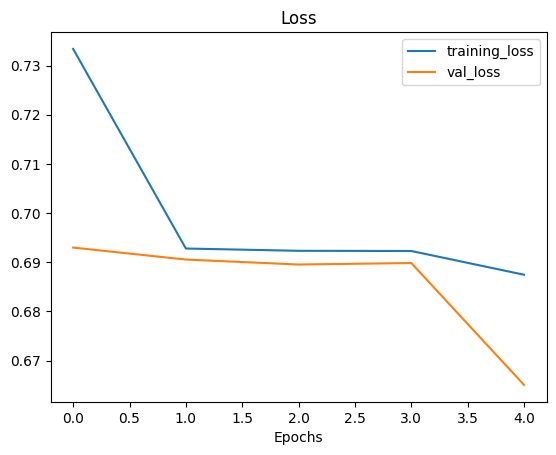

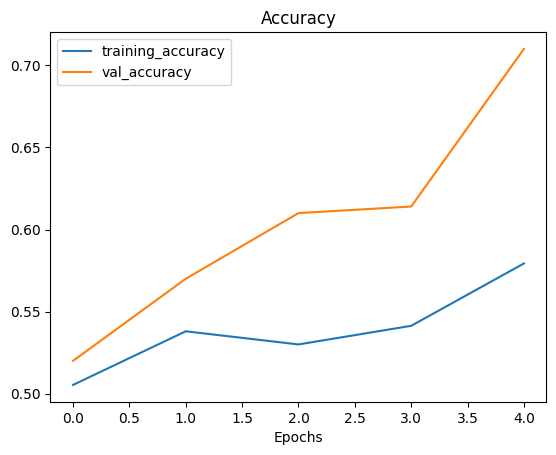

In [40]:
plot_loss_curves(history_6)

# Note:
* our model is not good at training but better at validation set
#**Let's Shuffle Data**
* Shuffling refers to the randomization of the order of the training examples in the dataset.

In [41]:
train_datagen_augmented_shuffled = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Augmented training images:")
train_data_augmented = train_datagen_augmented_shuffled.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) # shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [42]:
model_7 = Sequential([
    Conv2D(filters=10,kernel_size=(3,3),activation = 'relu',input_shape = (224,224,3)),
    MaxPool2D(pool_size=(2,2)), ## its default size is 2,2
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_7.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

history_7 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6231 - accuracy: 0.6580 - val_loss: 0.5063 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 20s 419ms/step - loss: 0.5883 - accuracy: 0.6820 - val_loss: 0.4821 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5525 - accuracy: 0.7293 - val_loss: 0.5395 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 20s 416ms/step - loss: 0.5338 - accuracy: 0.7453 - val_loss: 0.4252 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5145 - accuracy: 0.7533 - val_loss: 0.3732 - val_accuracy: 0.8600


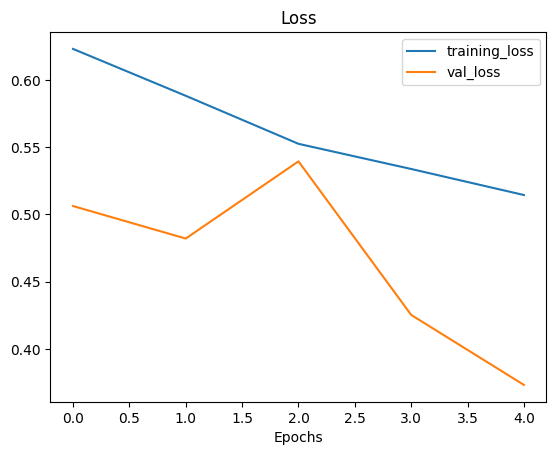

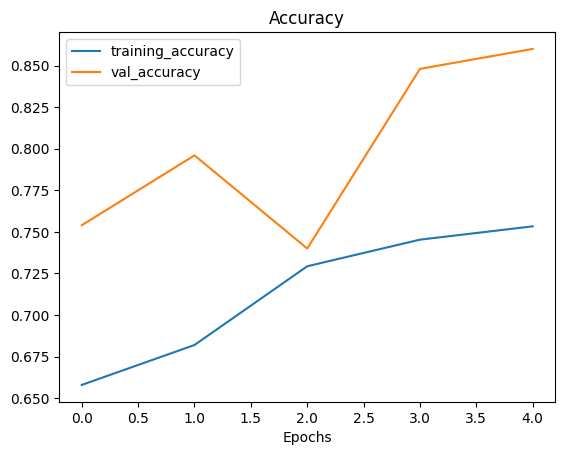

In [43]:
plot_loss_curves(history_7)

# Note:
* the problem we had earlier : we train the model in its usual normal order and it trains on Pizza dataset first and learns about that and then comes to steak dataset and learns it with the weights it learns from Pizza dataset.
* Shuffle : but when we shuffle training data we have steak and pizza data in unusual normal and model learns both of them.

# **Note : How to improve our model**
* Increase the number of model layers (add more Conv2D,MaxPool2D layers)
* add more filters in each conv layer
* Train for longer (more epochs)
* Find an ideal learning rate

In [44]:
class_names

NameError: name 'class_names' is not defined

In [46]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2024-06-17 10:23:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  7.91MB/s    in 0.2s    

2024-06-17 10:23:54 (7.91 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



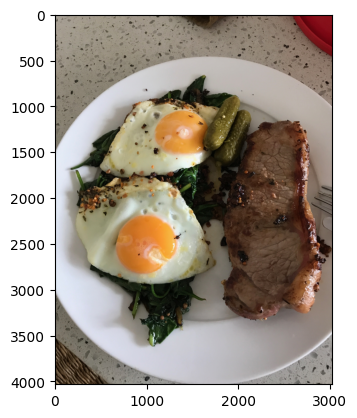

In [49]:
import cv2 as cv
import matplotlib.pyplot as plt
steak = cv.imread('03-steak.jpeg')
steak = cv.cvtColor(steak,cv.COLOR_BGR2RGB)
plt.imshow(steak)

In [50]:
 steak.shape

(4032, 3024, 3)

In [52]:
#model_7.predict(steak) ## errpr : because of input shape and image

In [55]:
expanded_steak = tf.expand_dims(steak,axis=0)
expanded_steak

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 111],
         [142, 121, 100],
         [101,  80,  59],
         ...,
         [164, 155, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  96],
         [138, 118,  94],
         [106,  85,  64],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 126, 102],
         [148, 128, 103],
         [114,  

#**Note :**
* we should preprocess the new data that our model can handle it.

In [58]:
def load_preprocess_image(filename,img_shape=224):
  img = tf.io.read_file(filename) ## finding file and read it.
  img = tf.image.decode_image(img) ## detects images with any types and convert it to tensors
  img = tf.image.resize(img,size = [img_shape,img_shape])
  img = img/255. ## rescale because our model is trained on rescaled data
  return img


In [59]:
steak = load_preprocess_image('03-steak.jpeg')
steak.shape ## as our model has trained on.

TensorShape([224, 224, 3])

In [62]:
model_7.predict(tf.expand_dims(steak,axis=0)) ## its output is image propability

1/1 [==============================] - 0s 270ms/step


array([[0.5192648]], dtype=float32)